# A quick look at the depth-age relationship for the seafloor.

We are going to work with the ETOPO1 dataset (Amante et al) which we can download from various services online when we need it. 
You can read more about the dataset here: https://ngdc.noaa.gov/mgg/global/


We need some libraries to help with downloading, manipulating and plotting the data:

  - `numpy` to manipulate arrays 
  - `xarray` which extends `numpy` for data that might be too big to read all at once
  - `matplotlib` and `cartopy` for plotting data on maps

In [1]:
import numpy as np
import xarray

import matplotlib.pyplot as plt
from matplotlib import cm  
%matplotlib inline

## References

Amante, C. “ETOPO1 1 Arc-Minute Global Relief Model: Procedures, Data Sources and Analysis.” National Geophysical Data Center, NOAA, 2009. https://doi.org/10.7289/V5C8276M.

## Read ETOPO data from a remote service

This is how we access the data - provide a url, open that url, and ask for a subset of the data (either by region or by taking every n'th value)

``` python
    etopo_dataset = "http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/ETOPO1_Bed_g_gmt4.nc"
    etopo_data = xarray.open_dataset(etopo_dataset)
    subs_data = etopo_data.sel(x=slice(left,right, 30), y=slice(bottom, top, 30))
```

Here we have requested every 30th data point.

In [2]:
(left, bottom, right, top) = (-180, -90, 180, 90)
map_extent = ( left, right, bottom, top)

etopo_dataset = "http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/ETOPO1_Bed_g_gmt4.nc"
etopo_data = xarray.open_dataset(etopo_dataset)
subs_data = etopo_data.sel(x=slice(left,right, 300), y=slice(bottom, top, 300))

lons = subs_data.coords.get('x')
lats = subs_data.coords.get('y')
vals = subs_data['z']

x,y = np.meshgrid(lons.data, lats.data)
height = vals.data

## Validation

Can you check to see what resolution data we have downloaded ?
(hint *the `height` data is a numpy array and has a `shape` attribute*)

Check here:

In [3]:
print("The shape of the array is ... ")

The shape of the array is ... 


and we should plot the data to see if it matches the image above and whether we need more resolution.
Does that look right ?

If the map is horribly pixelated, we might try downloading more data. Don't go mad or it will take forever.

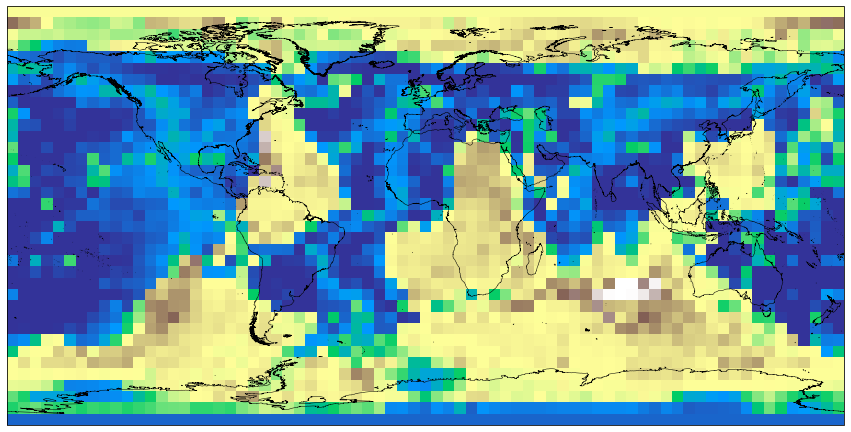

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                           edgecolor=(1.0,0.8,0.0),
                           facecolor="none")

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(map_extent)

ax.add_feature(coastline, edgecolor="black", linewidth=0.5, zorder=3)

plt.imshow(height, extent=map_extent, transform=ccrs.PlateCarree(),
           cmap='terrain', origin='upper', vmin=-5000., vmax=5000.)